In [1]:
"""
Imports
"""
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import statsmodels.stats.api as sms

In [2]:
samples_to_use_list = list(range(1000, 10000, 1000))
samples_to_use_list = samples_to_use_list + list(range(10000, 110000, 10000))

In [3]:
def get_conf_interval(data):
    mean = np.mean(data)
    lower_ci = mean - sms.DescrStatsW(data).tconfint_mean()[0]
    return mean, lower_ci
def get_complexity(method):
    measurements = (len(method['times']))
    
    mean_result = []
    err_result = []
    
    for index, measurement in enumerate(samples_to_use_list[:measurements]):        
        mean, lower_ci = get_conf_interval(method['times'][index])
        mean_result.append(mean)
        err_result.append(lower_ci)
        
    return mean_result, err_result

In [4]:
dbscan = json.loads(open('ExecutionTime/Results/dbscan_extended.json').read())
w_dbscan = json.loads(open('ExecutionTime/Results/wdbscan_extended.json').read())
lof = json.loads(open('ExecutionTime/Results/lof_extended.json').read())
ods = json.loads(open('ExecutionTime/Results/ods_extended.json').read())

exactSTORM = json.loads(open('ExecutionTime/Results/exactSTORM_extended.json').read())
cod = json.loads(open('ExecutionTime/Results/cod_extended.json').read())
rrcf = json.loads(open('ExecutionTime/Results/RRCF_extended.json').read())

In [5]:
mean_dbscan, err_dbscan = get_complexity(dbscan)
mean_w_dbscan, err_w_dbscan = get_complexity(w_dbscan)
mean_lof, err_lof = get_complexity(lof)
mean_ods, err_ods = get_complexity(ods)

mean_exactSTORM, err_exactSTORM = get_complexity(exactSTORM)
mean_cod, err_cod = get_complexity(cod)
mean_rrcf, err_rrcf = get_complexity(rrcf)

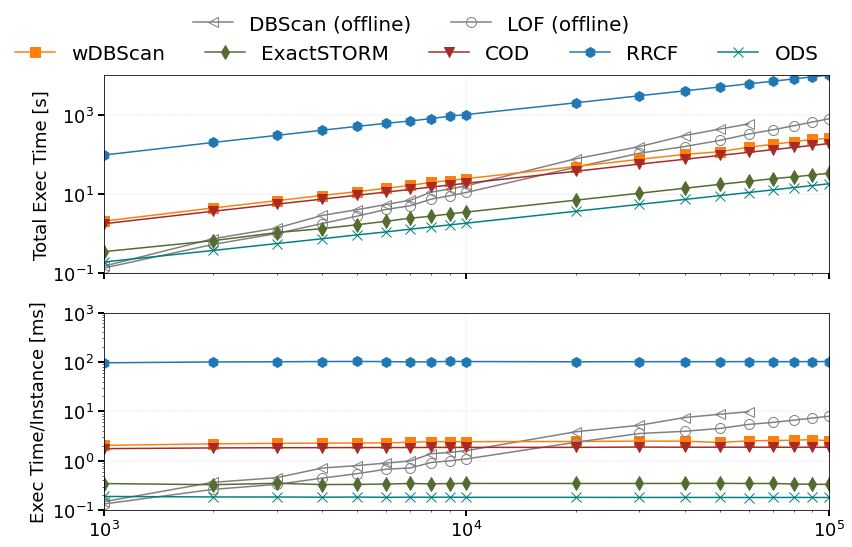

In [6]:
## fontsizeLegend = 15
fontsizeLabel = 18
fontsizeticks = 18

ticks = [0, 200000, 400000, 600000, 800000, 1000000, 1200000, 1400000]
lab = ['0', '200K', '400K', '600K', '800K', '1M', '1.2M', '1.4M']

markersize = 10
markers = {
    'dbscan': '<',
    'wdbscan': 's',
    'lof': 'o',
    'ods': 'x',
    'exactSTORM': 'd',
    'cod': 'v',
    'rrcf': 'h'
}

colors = {
    'dbscan': 'gray',
    'lof': 'gray',
    'wdbscan': 'C1',
    'ods': 'teal',
    'exactSTORM': 'darkolivegreen',
    'cod': 'brown',
    'rrcf': 'C0'
}

fig, ax = plt.subplots(2, sharex=True, figsize=(13,8))

"""
Total execution time
"""
dbscan_line = ax[0].loglog(samples_to_use_list[:len(mean_dbscan)],
             mean_dbscan, label='DBScan',
             marker=markers['dbscan'],
             color=colors['dbscan'],
             markersize=markersize,
             markerfacecolor='none')
lof_line = ax[0].loglog(samples_to_use_list[:len(mean_lof)],
             mean_lof, label='LOF',
             marker=markers['lof'],
             color=colors['lof'],
             markersize=markersize,
             markerfacecolor='none')
wdbscan_line = ax[0].loglog(samples_to_use_list[:len(mean_w_dbscan)],
             mean_w_dbscan, label = 'wDBScan',
             marker=markers['wdbscan'],
             color=colors['wdbscan'],
             markersize=markersize
#              markerfacecolor='none'
)
ods_line = ax[0].loglog(samples_to_use_list[:len(mean_ods)],
             mean_ods, label='ODS',
             marker=markers['ods'],
             color=colors['ods'],
             markersize=markersize)
exactstorm_line = ax[0].loglog(samples_to_use_list[:len(mean_exactSTORM)],
             mean_exactSTORM, label='ExactSTORM',
             marker=markers['exactSTORM'],
             color=colors['exactSTORM'],
             markersize=markersize
#              markerfacecolor='none'
)
cod_line = ax[0].loglog(samples_to_use_list[:len(mean_cod)],
             mean_cod, label='COD',
             marker=markers['cod'],
             color=colors['cod'],
             markersize=markersize
#              markerfacecolor='none'
)
rrcf_line = ax[0].loglog(samples_to_use_list[:len(mean_rrcf)],
             mean_rrcf, label='RRCF',
             marker=markers['rrcf'],
             color=colors['rrcf'],
             markersize=markersize
#              markerfacecolor='none'
)

ax[0].set_ylabel('Total Exec Time [s]', fontsize=fontsizeLabel, labelpad=1)
ax[0].tick_params(direction='out', length=6, width=2, colors='k',
               grid_color='r', grid_alpha=0.5, labelsize=fontsizeticks)

"""
Execution time  per sample
"""
ax[1].loglog(samples_to_use_list[:len(mean_dbscan)],
             np.array(mean_dbscan)*1000/np.array(samples_to_use_list[:len(mean_dbscan)]),
             marker=markers['dbscan'],
             color=colors['dbscan'],
             markersize=markersize,
             markerfacecolor='none'
)
ax[1].loglog(samples_to_use_list[:len(mean_w_dbscan)],
             np.array(mean_w_dbscan)*1000/np.array(samples_to_use_list[:len(mean_w_dbscan)]),
             marker=markers['wdbscan'],
             color=colors['wdbscan'],
             markersize=markersize
#              markerfacecolor='none'
)
ax[1].loglog(samples_to_use_list[:len(mean_lof)],
             np.array(mean_lof)*1000/np.array(samples_to_use_list[:len(mean_lof)]),
             marker=markers['lof'],
             color=colors['lof'],
             markersize=markersize,
             markerfacecolor='none'
)
ax[1].loglog(samples_to_use_list[:len(mean_ods)],
             np.array(mean_ods)*1000/np.array(samples_to_use_list[:len(mean_ods)]),
             marker=markers['ods'],
             color=colors['ods'],
             markersize=markersize
)
ax[1].loglog(samples_to_use_list[:len(mean_exactSTORM)],
             np.array(mean_exactSTORM)*1000/np.array(samples_to_use_list[:len(mean_exactSTORM)]),
             marker=markers['exactSTORM'],
             color=colors['exactSTORM'],
             markersize=markersize
#              markerfacecolor='none'
)
ax[1].loglog(samples_to_use_list[:len(mean_cod)],
             np.array(mean_cod)*1000/np.array(samples_to_use_list[:len(mean_cod)]),
             marker=markers['cod'],
             color=colors['cod'],
             markersize=markersize
#              markerfacecolor='none'
)
ax[1].loglog(samples_to_use_list[:len(mean_rrcf)],
             np.array(mean_rrcf)*1000/np.array(samples_to_use_list[:len(mean_rrcf)]),
             marker=markers['rrcf'],
             color=colors['rrcf'],
             markersize=markersize
#              markerfacecolor='none'
)


ax[1].set_ylabel('Exec Time/Instance [ms]', fontsize=fontsizeLabel)
ax[1].tick_params(direction='out', length=6, width=2, colors='k',
               grid_color='r', grid_alpha=0.5, labelsize=fontsizeticks)

ax[0].grid(linestyle='-.', linewidth=0.15, color='k')
ax[0].set_ylim(1e-1,1e4)
ax[0].set_xlim(samples_to_use_list[0], samples_to_use_list[-1])

ax[1].grid(linestyle='-.', linewidth=0.15, color='k')
ax[1].set_ylim(1e-1,1e3)

lines = ax[0].get_lines()
legend1 = ax[0].legend(
    [lines[i] for i in [0,1]],
    ["DBScan (offline)", "LOF (offline)"],
    bbox_to_anchor=(0.75, 1.4),
    ncol=4, fancybox=False,
    shadow=False, fontsize=20, frameon=False
)
legend2 = ax[0].legend(
    [lines[i] for i in [2,4,5,6,3]],
    ["wDBScan", "ExactSTORM", "COD", "RRCF", "ODS"],
    bbox_to_anchor=(1.01, 1.25),
    ncol=5, fancybox=False,
    shadow=False, fontsize=20, frameon=False
)

ax[0].add_artist(legend1)
fig.savefig('running_time_comparison.pdf', bbox_inches='tight')

In [7]:
features_set = 'ALL'
methods = ['wdbscan', 'exactSTORM', 'COD', 'rrcf', 'ods']

scores = []
cis_scores = []

for method in methods:
    method_scores = json.loads(open('../../Experiments/'+method+'/Results/'+method+'_general_results_test_'+features_set+'.json').read())
    scores.append(method_scores['fscore'])
    cis_scores.append(method_scores['ci_fscore'])

In [8]:
import scipy.stats as st
data = np.array(mean_ods)/samples_to_use_list
mean_data = np.mean(data)
ci = st.t.interval(0.95, len(data)-1,
              loc=np.mean(data),
              scale=st.sem(data))[0]

In [9]:
times = []
cis_times = []
for data in [mean_w_dbscan, mean_exactSTORM, mean_cod, mean_rrcf, mean_ods]:
    data = np.array(data)/samples_to_use_list
    mean_data = np.mean(data)
    ci = st.t.interval(0.95, len(data)-1,
              loc=np.mean(data),
              scale=st.sem(data))[0]
    
    times.append(mean_data)
    cis_times.append(mean_data-ci)

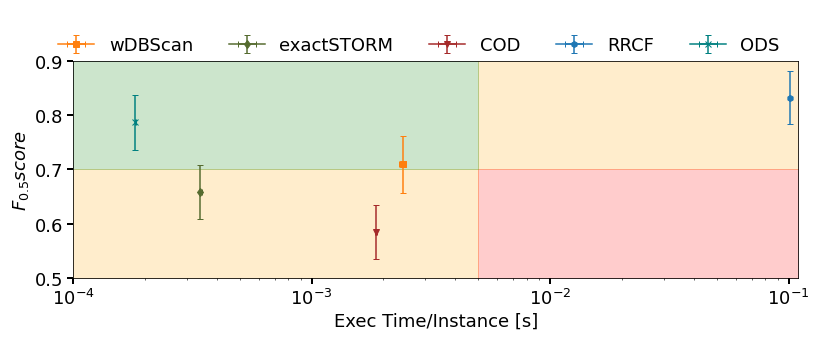

In [10]:
markers = {
    'dbscan': '<',
    'wdbscan': 's',
    'lof': 'o',
    'ods': 'x',
    'exactSTORM': 'd',
    'COD': 'v',
    'rrcf': 'h'
}

colors = {
    'dbscan': 'gray',
    'lof': 'gray',
    'wdbscan': 'C1',
    'ods': 'teal',
    'exactSTORM': 'darkolivegreen',
    'COD': 'brown',
    'rrcf': 'C0'
}

labels = {
    'dbscan': 'DBScan',
    'wdbscan': 'wDBScan',
    'ods': 'ODS',
    'exactSTORM': 'exactSTORM',
    'COD': 'COD',
    'rrcf': 'RRCF'
}


fig, ax = plt.subplots(figsize=(13,4))

plot_list = []

for method, time, score, ci_time, ci_score in zip(methods, times, scores, cis_times, cis_scores):
    plot = ax.errorbar(
        time, 
        score,
        xerr=ci_time,
        yerr=ci_score,
        marker=markers[method],
        color=colors[method],
        label=labels[method],
        capsize=3
    )
    plot_list.append(plot_list)
    
ax.set_xscale('log')

ax.set_ylabel('$F_{0.5}score$', fontsize=fontsizeLabel)
ax.set_xlabel('Exec Time/Instance [s]', fontsize=fontsizeLabel)
ax.set_xlim(1e-4, 1.1e-1)


ax.fill_between([1e-4,5e-3],[0.5,0.5],[0.7, 0.7],
                alpha=0.2,
                color='orange')
ax.fill_between([5e-3, 2e-1],[0.7,0.7],[0.90, 0.90],
                alpha=0.2,
                color='orange')
ax.fill_between([5e-3, 2e-1],[0.7,0.7],[0.50, 0.50],
                alpha=0.2,
                color='red')
ax.fill_between([1e-4,5e-3],[0.7,0.7],[0.90, 0.90],
                alpha=0.2,
                color='green')

ax.set_ylim(0.5,0.9)

ax.tick_params(direction='out', length=6, width=2, colors='k',
               grid_color='r', grid_alpha=0.5, labelsize=fontsizeticks)

fig.legend(bbox_to_anchor=(0.85, 1.1),
          ncol=5, fancybox=False,
          shadow=False, 
          fontsize=18,
          frameon=False)

fig.savefig('scatter_fscore_runningtime.pdf', bbox_inches='tight')